In [1]:
# import libraries
import pandas as pd
import sqlite3


import numpy as np
from numpy import std, mean, sqrt
import scipy.stats as stats
from statsmodels.stats.power import tt_ind_solve_power
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
conn = sqlite3.Connection('DW_Northwind.db')
cur = conn.cursor()

# ¿Fue el mismo desempeño de ventas de las oficinas de diferentes ciudades?


In [4]:
# Aggregating sales data from each office
cur.execute("""Select od.OrderId,
                      od.ProductId,
                      od.UnitPrice*od.Quantity Ingresos,
                      e.Region,
                      e.City,
                      e.Country
               From FactSales od
               Join DimEmployee e On e.EmployeeId = od.EmployeeId
               Group by 1         
;""")
Sales_per_office = pd.DataFrame(cur.fetchall())
Sales_per_office.columns = [x[0] for x in cur.description]
Sales_per_office.head()

,OrderID,ProductID,Ingresos,Region,City,Country
0,11079,17,195.00,North America,Seattle,USA
1,11080,16,314.10,North America,Seattle,USA
2,11081,61,798.00,British Isles,London,UK
3,11082,65,1031.45,North America,Tacoma,USA
4,11083,31,375.00,British Isles,London,UK


In [6]:
print(len(Sales_per_office))
Sales_per_office['City'].value_counts()

15984


London      7154
Seattle     3533
Kirkland    1837
Redmond     1751
Tacoma      1709
Name: City, dtype: int64

In [7]:
for city in Sales_per_office['City'].unique():
    print(city, Sales_per_office[Sales_per_office['City']==city]['Ingresos'].mean())

Seattle 716.169651853948
London 733.5394227005872
Tacoma 724.7984318314802
Kirkland 725.919069134459
Redmond 729.4871387778411


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

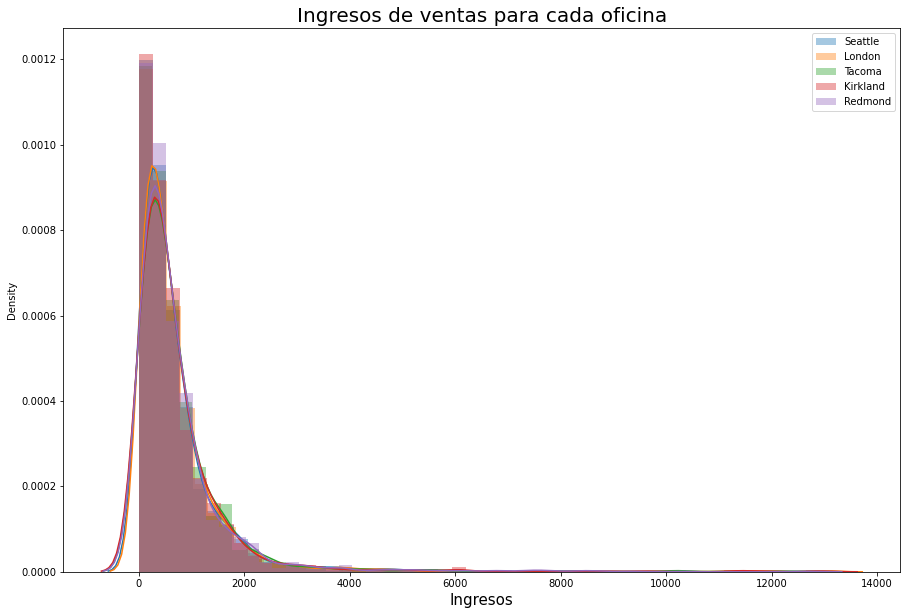

In [8]:
#Normality check
plt.figure(figsize=(15,10))
for city in Sales_per_office['City'].unique():
    sns.distplot(Sales_per_office[Sales_per_office['City']==city]['Ingresos'], label=city)
plt.title('Ingresos de ventas para cada oficina', fontsize=20)
plt.xlabel('Ingresos', fontsize=15)
plt.legend()

# vemos una igualdad entre los ingresos de London Y Seattle Despues Redmond con un empate de media final de Kikland y Tacoma

In [9]:
# Variance Check
#La varianza es el promedio de las desviaciones al cuadrado de la media
for city in Sales_per_office['City'].unique():
    print(city, (Sales_per_office[Sales_per_office['City']==city]['Ingresos'].var()))

Seattle 989819.7041048883
London 1147230.6472773503
Tacoma 1014967.0808060882
Kirkland 1143016.3682467898
Redmond 1030368.568023865


In [10]:
# Variance Check
for city in Sales_per_office['City'].unique():
    print(city, (Sales_per_office[Sales_per_office['City']==city]['Ingresos'].sum()))

Seattle 2530227.38
London 5247741.029999999
Tacoma 1238680.52
Kirkland 1333513.33
Redmond 1277331.98


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

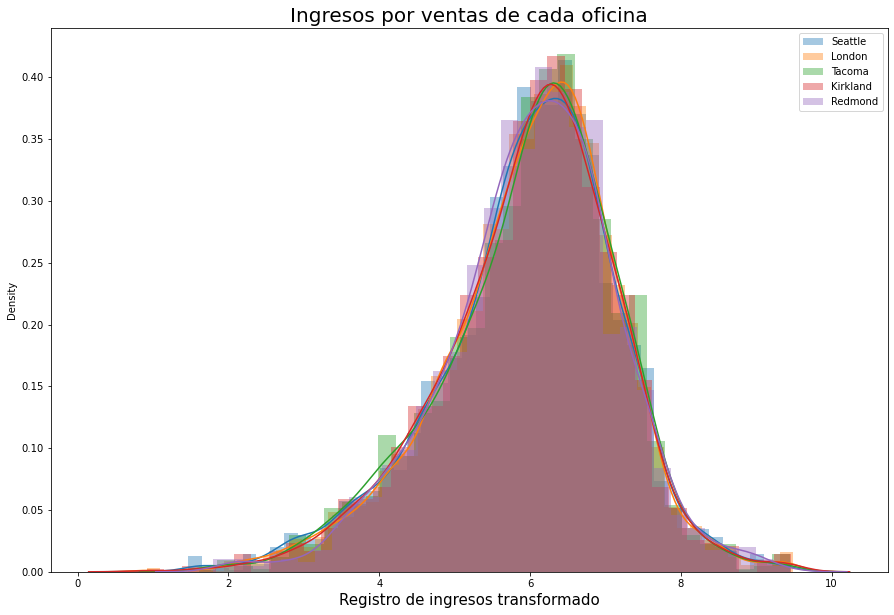

In [11]:
# Log Transformation
Sales_per_office_log = Sales_per_office.copy()
Sales_per_office_log['LogIngresos'] = np.log(Sales_per_office['Ingresos'])
Sales_per_office_log.head()
#Normality check
plt.figure(figsize=(15,10))
for city in Sales_per_office['City'].unique():#valores unicos
    sns.distplot(Sales_per_office_log[Sales_per_office_log['City']==city]['LogIngresos'], label=city)
plt.title('Ingresos por ventas de cada oficina', fontsize=20)
plt.xlabel('Registro de ingresos transformado', fontsize=15)
plt.legend()

# Londo tacoma y Kirkland Lideran en ventas personales 